### Q1

In [238]:
from itertools import product 
import pandas  as pd 
from sklearn.linear_model import LinearRegression
import datetime as dt 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 



In [7]:
# mapping of positions> keys 
d= dict()
d={0:(0,0), 1: (0,1), 2: (0,2) , 3:(0, 3), \
   4:(1,0), 5: (1,1), 6: (1,2) , 7:(1, 3),\
   8:(2,0), 9: (2,1), 10: (2,2) , 11:(2, 3),\
   12:(3,0), 13: (3,1), 14: (3,2) , 15:(3, 3),\
  }

In [21]:
d2 ={}
for key, value in d.iteritems():
   d2[value]=key

In [22]:
d2

{(0, 0): 0,
 (0, 1): 1,
 (0, 2): 2,
 (0, 3): 3,
 (1, 0): 4,
 (1, 1): 5,
 (1, 2): 6,
 (1, 3): 7,
 (2, 0): 8,
 (2, 1): 9,
 (2, 2): 10,
 (2, 3): 11,
 (3, 0): 12,
 (3, 1): 13,
 (3, 2): 14,
 (3, 3): 15}

In [67]:
def knight_moves_one_step(position, total):
    """
    move knight one time
    
    input: position, running_total
    return: expected value, a list of positions after one move 
    """
    x, y = position
    moves = list(product([x-1, x+1],[y-2, y+2])) + list(product([x-2,x+2],[y-1,y+1]))
    moves = [(x,y) for x,y in moves if x >= 0 and y >= 0 and x < 4 and y < 4]
    
    length= len(moves) 
    s=0 
    for i in moves: 
        s+= d2[i]*1.0/length
    
    return moves, s + total 

In [104]:
d2.keys(), d2.values()

([(0, 1),
  (1, 2),
  (3, 2),
  (0, 0),
  (3, 3),
  (3, 0),
  (3, 1),
  (2, 1),
  (0, 2),
  (2, 0),
  (1, 3),
  (2, 3),
  (2, 2),
  (1, 0),
  (0, 3),
  (1, 1)],
 [1, 6, 14, 0, 15, 12, 13, 9, 2, 8, 7, 11, 10, 4, 3, 5])

In [91]:
position_list= knight_moves_one_step(j, total)[0]
    total=knight_moves_one_step(position_list)[1]

list

In [116]:
position_list=d2.keys()
total= d2.values() 

position_total=dict() 
for i in range(16): 
    for j, v in enumerate(position_list):
        position_list= knight_moves_one_step(v, total[j])[0]
        #print position_list
        temp_total =knight_moves_one_step(v, total[j])[1]
        #print temp_total
        total.append(temp_total)

print total

[1, 6, 14, 0, 15, 12, 13, 9, 2, 8, 7, 11, 10, 4, 3, 5, 9.333333333333334, 15.0, 20.666666666666664, 7.5, 22.5, 19.5, 20.0, 15.0, 10.0, 15.0, 15.0, 17.666666666666668, 15.0, 12.333333333333332, 10.5, 15.0, 8.5, 12.666666666666668, 21.5, 6.666666666666666, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664, 8.0, 16.0, 22.0, 9.333333333333334, 12.0, 20.666666666666664]


In [80]:
from random import randint

# Move a knight from (x, y) to a random new position
def new_position(x, y):

    while True:
        dx, dy = 1, 2

        # it takes three bits to determine a random knight move:
        # (1, 2) vs (2, 1), and the sign of each
        r = randint(0, 7)
        if r % 2:
            dx, dy = dy, dx
        if (r >> 1) % 2:
            dx = -dx
        if (r >> 2) % 2:
            dy = -dy

        newx, newy = x + dx, y + dy
        # If the new position is on the board, take it.
        # Otherwise try again.
        if (newx >= 0 and newx < 8 and newy >= 0 and newy < 8):
            return (newx, newy)

# Count the number of steps in one random tour
def random_tour():
    x, y = x0, y0 = 0, 0
    count = 0
    while True:
        x, y = new_position(x, y)
        count += 1
        if x == x0 and y == y0:
            return count

# Average the length of many random tours

sum = 0
num_reps = 100000
for i in xrange(num_reps):
    sum += random_tour()
print sum / float(num_reps)
    

166.8252


In [83]:
new_position(0, 0)

(1, 2)

In [84]:
random_tour()

156

### Q2 

In [7]:
accidents= pd.read_csv('data/Accidents0514.csv')
casualties= pd.read_csv('data/Casualties0514.csv')
vehicles= pd.read_csv('data/Vehicles0514.csv')

In [17]:
#What fraction of accidents occur in urban areas? Report the answer in decimal form.

accidents[accidents.Urban_or_Rural_Area==1].Accident_Index.count()*1.000/accidents.Accident_Index.count()

0.64265691086842169

In [44]:
accidents[['month', 'day', 'year']]= accidents.Date.str.split('/', expand=True)

In [50]:
df= accidents.groupby('year').Accident_Index.count().reset_index()

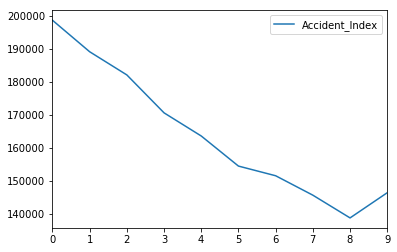

In [51]:
df.plot(kind='line')

In [61]:
df['year']=df.year.astype(int, inplace=True)
#df.Accident_Index.astype(int,inplace=True)

In [64]:
slope, intercept = np.polyfit(df.year, df.Accident_Index, 1)

In [65]:
slope

-6511.7272727276322

In [66]:
df

,year,Accident_Index
0,2005,198735
1,2006,189161
2,2007,182115
3,2008,170591
4,2009,163554
5,2010,154414
6,2011,151474
7,2012,145571
8,2013,138660
9,2014,146322


In [77]:
df3=pd.merge(accidents, vehicles[['Accident_Index', 'Skidding_and_Overturning']], on ='Accident_Index')

In [93]:
df3['new_weather']=df3.Weather_Conditions.apply(lambda x:1 if x==1 else 0 )

In [94]:
df3[df3.Skidding_and_Overturning== 1].groupby('new_weather').Accident_Index.count()*1.0000/\
df3.groupby('new_weather').Accident_Index.count()

new_weather
0    0.152866
1    0.083491
Name: Accident_Index, dtype: float64

In [95]:
# get the odds

0.152866/0.083491

1.8309278844426347

In [100]:
df4=pd.merge(accidents, casualties, how ='left', on ='Accident_Index') 

In [101]:
df4.columns

Index([u'Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location', u'month', u'day', u'year',
       u'Vehicle_Reference', u'Casualty_Reference', u'Casualty_Class',
       u'Sex_of_Casualty', u'Age_of_Casualty', u'Age_Band_of_Casualty',
     

In [133]:
df4['fatal']=df4.Casualty_Severity.apply(lambda x: 1 if x==3 else 0) ## assuming severity 3 is fatal 

In [162]:
df4['hour']=df4.Time.apply(lambda x: str(x).split(':')[0])

In [237]:
#frequency of fatal accidents by hour 
df4[df4.fatal==1].groupby('hour').Accident_Index.count().round(10)/df4.groupby('hour').Accident_Index.count()*1.00000

hour
00     0.816367
01     0.808013
02     0.796608
03     0.798905
04     0.798625
05     0.809576
06     0.842965
07     0.877357
08     0.906408
09     0.899731
10     0.887566
11     0.890955
12     0.892738
13     0.890617
14     0.885158
15     0.882783
16     0.882044
17     0.884021
18     0.878800
19     0.871213
20     0.861455
21     0.854219
22     0.846960
23     0.837478
nan    0.816993
Name: Accident_Index, dtype: float64

In [170]:
#ratio of Number_of_Casualties to number of accidents 
df4.groupby('Speed_limit').Number_of_Casualties.sum()*1.0000/df4.groupby('Speed_limit').Accident_Index.count()

Speed_limit
10    1.300000
15    1.222222
20    1.436268
30    1.653736
40    1.964187
50    2.091501
60    2.164758
70    2.473766
dtype: float64

In [177]:
df5=pd.DataFrame(df4.groupby('Speed_limit').Number_of_Casualties.sum()*1.0000/df4.groupby('Speed_limit').Accident_Index.count()) 

In [191]:
df5.reset_index(inplace=True)
df5.columns=['speed_limit', 'ratio'] 

In [199]:
#pearson corr 
df5.corr('pearson')

,speed_limit,ratio
speed_limit,1.000000,0.985596
ratio,0.985596,1.000000


In [202]:
df6=pd.merge(df4, vehicles[['Accident_Index', 'Sex_of_Driver', 'Vehicle_Reference']],\
         on =['Vehicle_Reference','Accident_Index' ]) 

In [208]:
df6.groupby('Sex_of_Driver').Accident_Index.count() # assume 1 is male , 2 is female  

Sex_of_Driver
-1          4
 1    1470075
 2     707146
 3      39495
Name: Accident_Index, dtype: int64

In [206]:
df6[df6.fatal==1].groupby('Sex_of_Driver').Accident_Index.count()*1.000/\
df6.groupby('Sex_of_Driver').Accident_Index.count()

Sex_of_Driver
-1    1.000000
 1    0.858302
 2    0.918158
 3    0.840435
Name: Accident_Index, dtype: float64

In [209]:
#odds ratio of male to female
0.858302/0.918158

0.9348086059262131

In [216]:
#accidents by age of driver
df7=pd.merge(df4, vehicles[['Accident_Index', 'Sex_of_Driver', 'Vehicle_Reference' , 'Age_of_Driver']],\
         on =['Vehicle_Reference','Accident_Index' ]) 

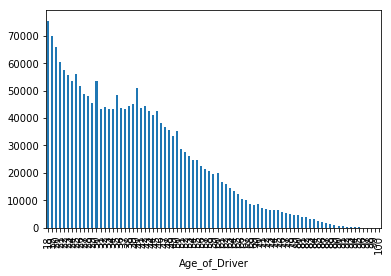

In [219]:
df7=df7[df7.Age_of_Driver>17 ]

df7.groupby('Age_of_Driver').Accident_Index.count().plot(kind='bar')


In [221]:
df8=df7.groupby('Age_of_Driver').Accident_Index.count().reset_index()

In [225]:
# get the rate at which the number of accidents exponentially decays with age
x=df8.Age_of_Driver
y=df8.Accident_Index
np.polyfit(x, np.log(y), 1)

array([ -0.07970002,  13.77983097])

### Q3 

In [249]:
!pip install mpl_toolkits

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
%matplotlib inline

In [3]:
DATA_FILE = './uber-pickups-in-new-york-city/uber-raw-data-aug14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

In [10]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
#plt.title('Journeys by Week Day');


In [11]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
#plt.title('Journeys by Month Day');

In [12]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
#plt.title('Journeys by Hour');


In [9]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);